# Proyek Analisis Data:
Dataset yang digunakan untuk analisis ini adalah:
- **1. hour.csv**: berisi data peminjaman sepeda per jam
- **2. day.csv**: berisi data peminjaman sepeda per hari
- **Nama:** [Bathara Bisma Saputra]
- **Email:** [bathara.bisma@mhs.itenas.ac.id]
- **ID Dicoding:** [batharabisma]

## Menentukan Pertanyaan Bisnis

- Faktor apa saja yang paling mempengaruhi banyaknya sepeda yang dipinjam dalam sehari?
- Bagaimana pola penggunaan sepeda berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

hour_data = pd.read_csv('/content/drive/MyDrive/dataset/hour.csv')
day_data = pd.read_csv('/content/drive/MyDrive/dataset/day.csv')

## Data Wrangling

### Gathering Data

In [3]:
hour_data.head()
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- 2 buah file csv yaitu hour.csv dan day.csv yang berisikan informasi tentang peminjaman sepeda per jam dan per hari
- fitur utama yang tersedia mencakup informasi waktu (season, yr, mnth, hr), kondisi cuaca (weathersit, temp, hum, windspeed), dan jumlah pengguna sepeda (casual, registered, cnt).

### Assessing Data

In [4]:
hour_data.info()
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

**Insight:**
- dari hasil diatas, tidak ditemukan missing value pada kedua file
- kolom 'dteday' akan dikonversi menjadi format datetime untuk mempermudah analisis menjadi waktu

### Cleaning Data

In [ ]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

hour_data_cleaned = hour_data.drop(columns=['instant'])
day_data_cleaned = day_data.drop(columns=['instant'])

**Insight:**
- kolom 'insight' sudah dihapus karena tidak relevan
- kolom 'dteday' sudah dikonversi menjadi tipe datatime

## Exploratory Data Analysis (EDA)

### Explore ...

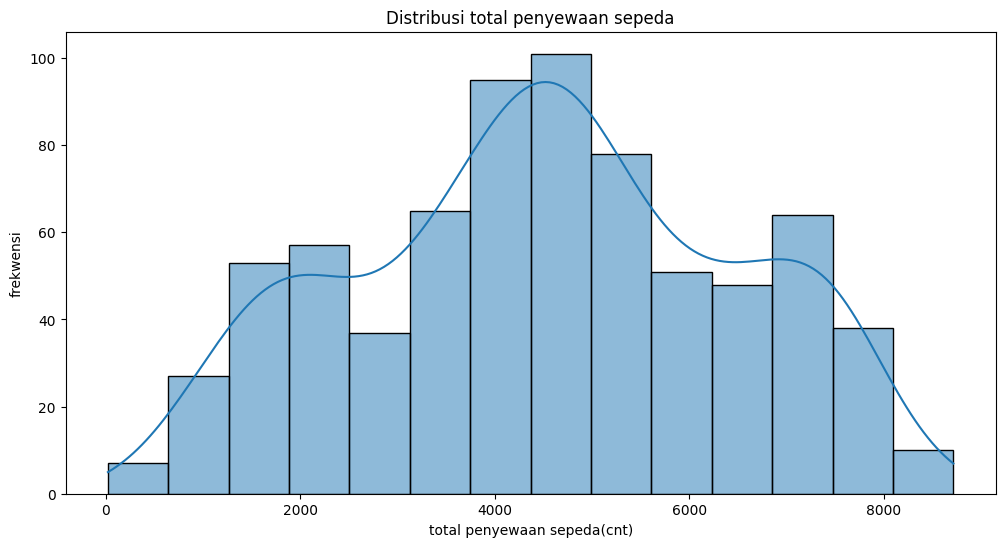

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


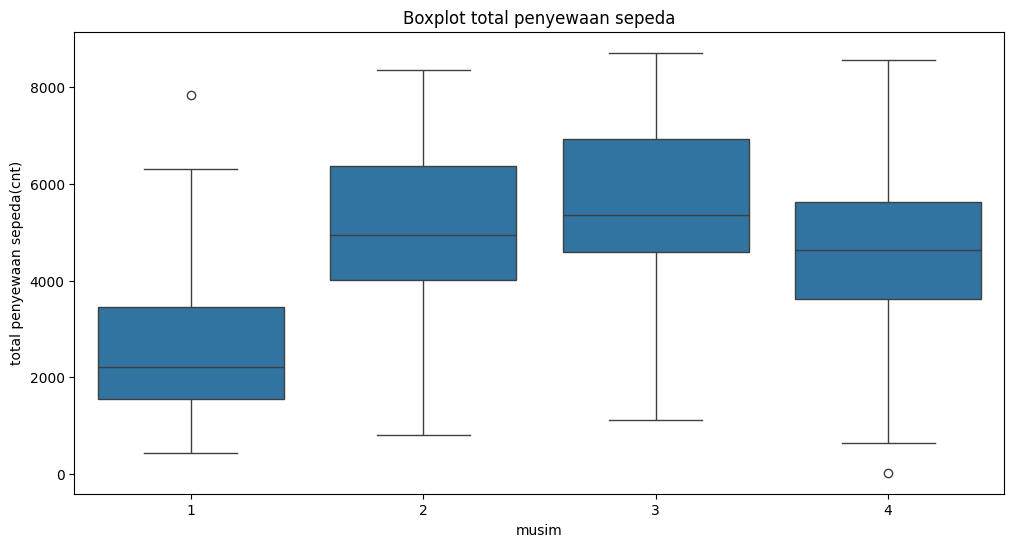

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(day_data_cleaned['cnt'], kde=True)
plt.title('Distribusi total penyewaan sepeda')
plt.xlabel('total penyewaan sepeda(cnt)')
plt.ylabel('frekwensi')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=day_data_cleaned, x='season', y='cnt')
plt.title('Boxplot total penyewaan sepeda')
plt.xlabel('musim')
plt.ylabel('total penyewaan sepeda(cnt)')
plt.show()

**Insight:**
- dari visualisasi diatas pengguna sepeda (cnt) berada di angka kisaran 2000 sampai 5000 peminjaman per hari
- beberapa hari menunjukan angka peminjaman lebih tinggi, kemungkinan terjadi di hari atau musim tertentu

## Visualization & Explanatory Analysis

### Pertanyaan 1:

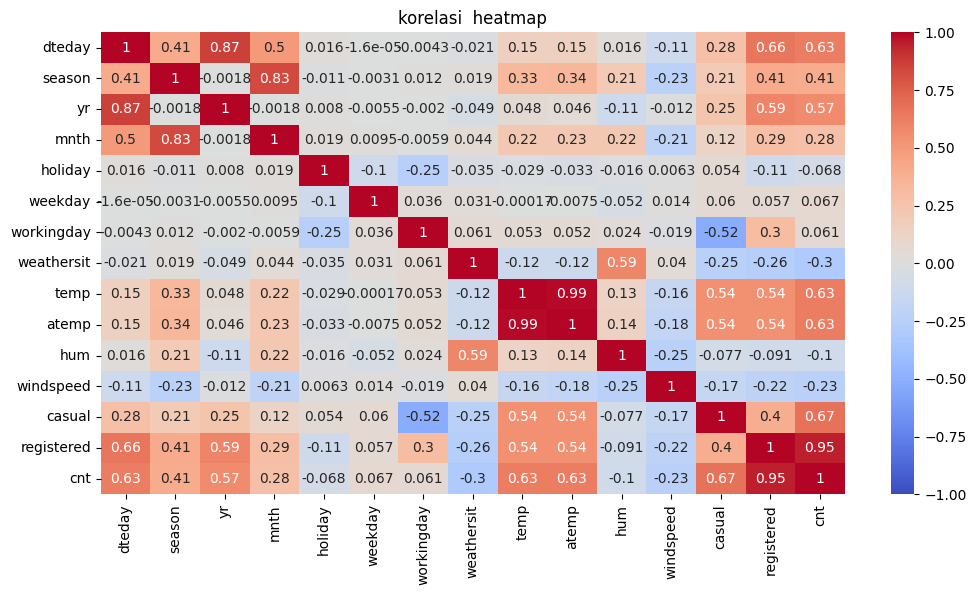

In [ ]:
##faktor apa saja yang mempengaruhi jumlah sepeda dipinjam?
plt.figure(figsize=(12,6))
corr = day_data_cleaned.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('korelasi  heatmap')
plt.show()

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


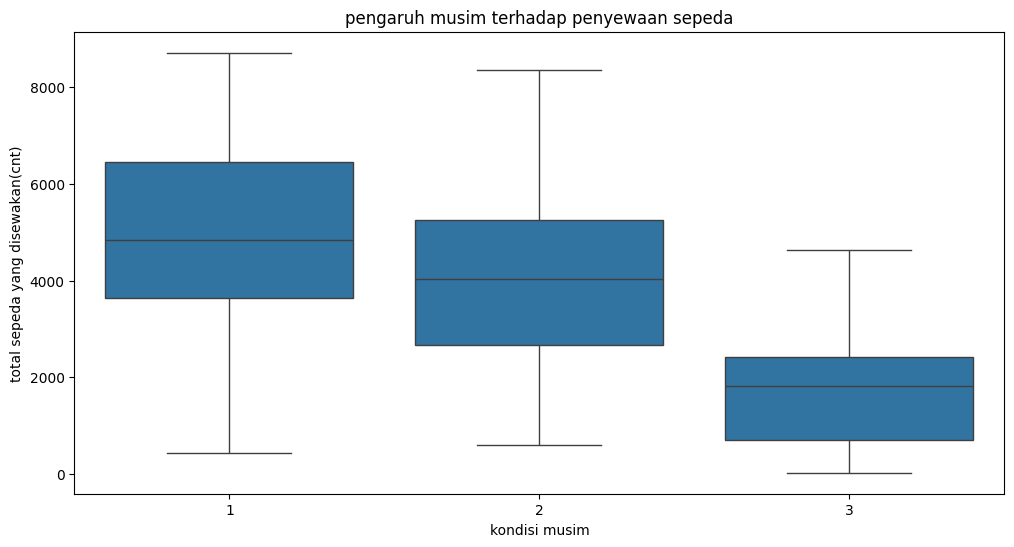

In [ ]:
##bagaimana pola penggunaan sepeda berdasarkan musim?
plt.figure(figsize=(12,6))
sns.boxplot(data=day_data_cleaned, x='weathersit', y='cnt')
plt.title('pengaruh musim terhadap penyewaan sepeda')
plt.xlabel('kondisi musim')
plt.ylabel('total sepeda yang disewakan(cnt)')
plt.show()

**Insight:**
- (temp) memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda (cnt)
- cuaca yang cerah atau berawan ringan (weathersit 1 dan 2) menunjukan penyewaan yang lebih tinggi

## Analisis Lanjutan (Opsional)

In [5]:
#membagi data ke dalam kelompok berdasarkan jumlah sepeda yang disewa
hour_data['casual_bin'] = pd.cut(hour_data['casual'], bins=3, labels=["low","medium","high"])
hour_data['registered_bin'] = pd.cut(hour_data['registered'], bins=3, labels=["Low", "Medium", "High"])

hour_data[['casual_bin', 'registered_bin']].value_counts()

casual_bin  registered_bin
low         Low               14237
            Medium             1707
medium      Low                 567
low         High                377
medium      Medium              304
high        Medium              125
            Low                  35
medium      High                 26
high        High                  1
Name: count, dtype: int64

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 1
Faktor apa saja yang paling mempengaruhi banyaknya sepeda yang dipinjam dalam sehari?
1. jenis penyewa: Penyewa (registered) cenderung lebih banyak menyewa sepeda dibandingkan dengan penyewa  (casual). Hal ini mungkin disebabkan oleh keuntungan dari keanggotaan yang membuat penyewa (registered) lebih aktif.
2. kondisi cuaca: Jumlah penyewa meningkat secara signifikan pada hari-hari dengan cuaca baik, menunjukkan bahwa cuaca menjadi faktor utama dalam keputusan penyewaan.
3. hari dalam minggu: penyewaan sepeda lebih tinggi pada akhir pekan, kemungkinan karena peningkatan kegiatan rekreasi di kalangan masyarakat.
4. waktu dalam hari: Terdapat pola penyewaan yang jelas berdasarkan waktu, di mana jam sibuk menunjukkan tingkat penyewaan yang lebih tinggi, menandakan bahwa sepeda banyak digunakan untuk keperluan transportasi.

- Conclution pertanyaan 2
dari hasil visualisasi yang ada:
1. suhu memliki hubungan positif yang kuat dengan jumlah penyewaan sepeda
2. kelembapan dan kecepetan angin memiliki korelasi negatif, yang menunjukan bahwa kondisi cuaca ekstrim dll dapat mengurangi jumlah penyewaan sepeda